# Deep Convolutional VAE with face emotion data

In [1]:
import os
import numpy as np
import tensorflow as tf
import tensorflow.contrib.slim as slim
import matplotlib.pyplot as plt
from util import gpusession,plot_grid_imgs
from model import basic_dcvae
from custom_ops import lrelu
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print ("Packages Loaded")

Packages Loaded


Load Data

In [2]:
loadpath = '../data/face_emotion.npz'
l = np.load(loadpath)
trainimg,trainlabel = l['trainimg'],l['trainlabel']
testimg,testlabel = l['testimg'],l['testlabel']
valimg,vallabel = l['valimg'],l['vallabel']
ntrain,ntest,nval = trainimg.shape[0],testimg.shape[0],valimg.shape[0]
X,Y,imgcnt,labels,xshp=l['X'],l['Y'],l['imgcnt'],l['labels'],l['rszshape']
xdim,nclass = X.shape[1],Y.shape[1]
print ("[%d] images with xshape:[%s] and nclass:[%d]"%(X.shape[0],xshp,nclass))
print ("#Train:[%d] #Test[%d] #Validation[%d]"%(ntrain,ntest,nval))

[35886] images with xshape:[[64 64]] and nclass:[7]
#Train:[25120] #Test[7177] #Validation[3589]


Instantiate DCVAE

In [3]:
V = basic_dcvae(_name='DCVAE',_xdim=xshp,_zdim=128,
                _filtersize=[5,5],_nfilter=128,_actv=lrelu,
                _lr=0.0005,_beta1=0.9,_beta2=0.99,_epsilon=1e-2)

[DCVAE] Instantiated
 xdim:[[64 64  1]] zdim:[128] nfilter:[128] filtersize:[[5, 5]]
Trainable Variables
 [0] Name:[encoder/conv0/weights:0] Shape:[[5, 5, 1, 128]]
 [1] Name:[encoder/conv0/biases:0] Shape:[[128]]
 [2] Name:[encoder/conv1/weights:0] Shape:[[5, 5, 128, 256]]
 [3] Name:[encoder/conv1/BatchNorm/beta:0] Shape:[[256]]
 [4] Name:[encoder/conv2/weights:0] Shape:[[5, 5, 256, 512]]
 [5] Name:[encoder/conv2/BatchNorm/beta:0] Shape:[[512]]
 [6] Name:[encoder/conv3/weights:0] Shape:[[5, 5, 512, 1024]]
 [7] Name:[encoder/conv3/BatchNorm/beta:0] Shape:[[1024]]
 [8] Name:[encoder/zmu/weights:0] Shape:[[16384, 128]]
 [9] Name:[encoder/zmu/biases:0] Shape:[[128]]
 [10] Name:[encoder/zlogvar/weights:0] Shape:[[16384, 128]]
 [11] Name:[encoder/zlogvar/biases:0] Shape:[[128]]
 [12] Name:[decoder/lin0/weights:0] Shape:[[128, 16384]]
 [13] Name:[decoder/lin0/biases:0] Shape:[[16384]]
 [14] Name:[decoder/lin0_bn/beta:0] Shape:[[1024]]
 [15] Name:[decoder/up1/weights:0] Shape:[[5, 5, 512, 1024

Optimize DCVAE

[0e+00/1e+04 0.0%][kl_weight:1.00] [LOSS] TOTAL[2808.6]=RECON[1953.4]+KL[855.2]


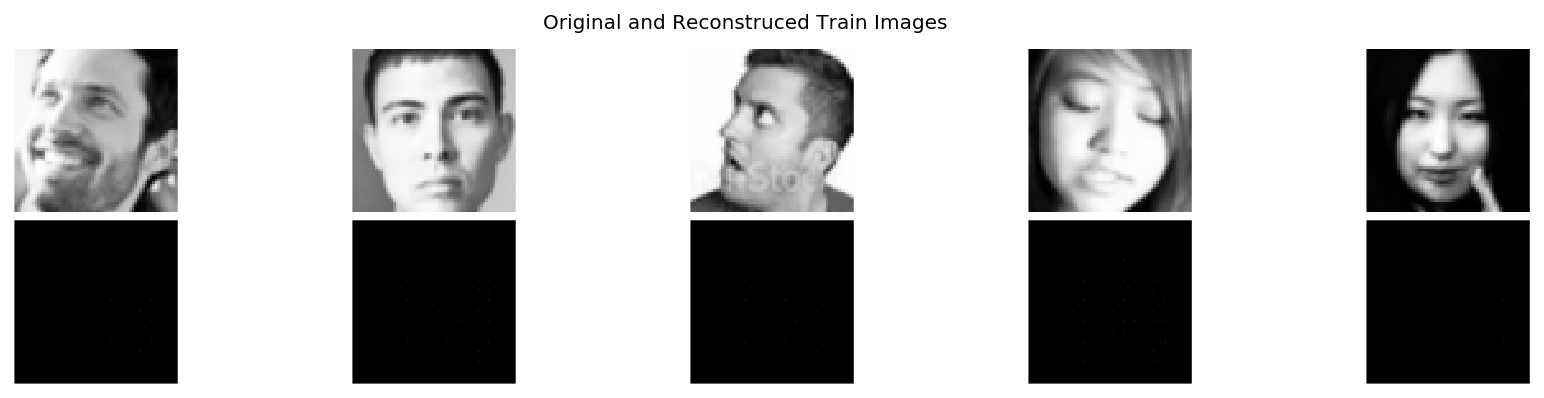

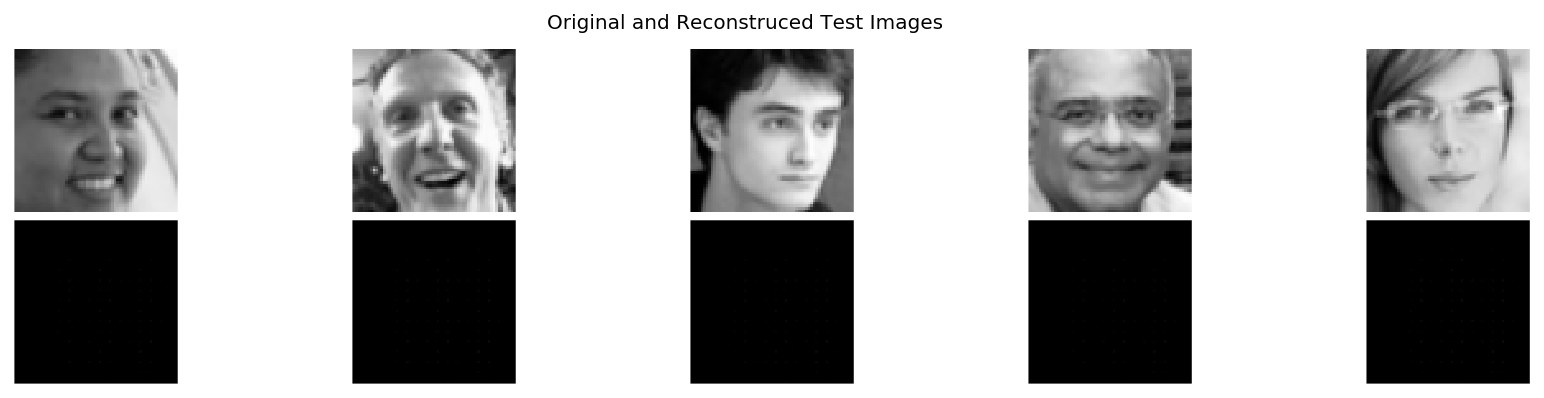

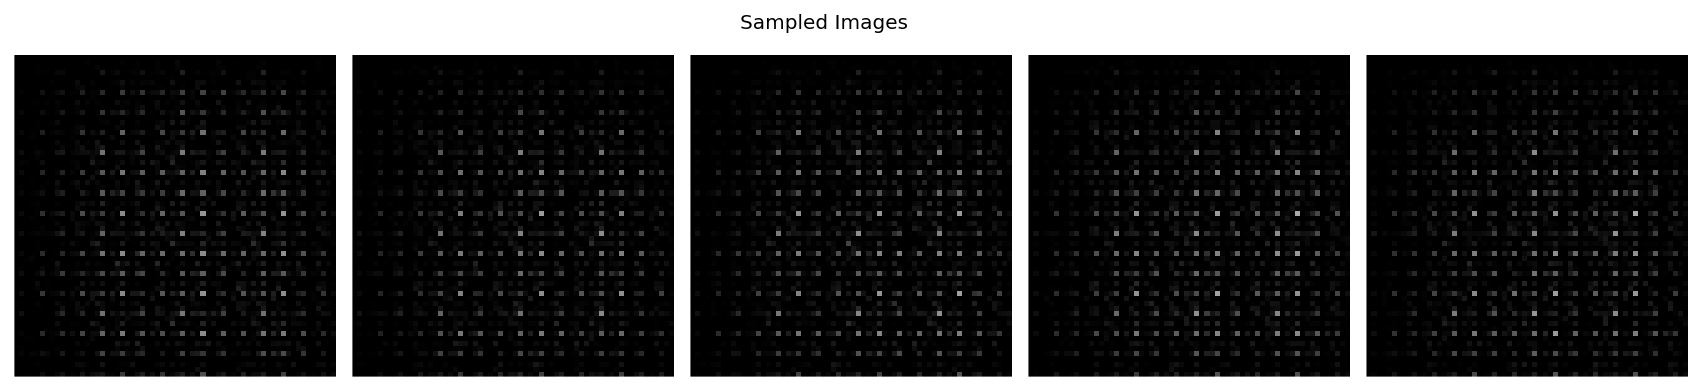

[2e+02/1e+04 2.0%][kl_weight:1.00] [LOSS] TOTAL[932.0]=RECON[917.1]+KL[14.9]
[4e+02/1e+04 4.0%][kl_weight:1.00] [LOSS] TOTAL[712.8]=RECON[696.5]+KL[16.4]
[6e+02/1e+04 6.0%][kl_weight:1.00] [LOSS] TOTAL[513.3]=RECON[491.0]+KL[22.3]
[8e+02/1e+04 8.0%][kl_weight:1.00] [LOSS] TOTAL[411.8]=RECON[366.0]+KL[45.8]
[1e+03/1e+04 10.0%][kl_weight:1.00] [LOSS] TOTAL[322.5]=RECON[276.1]+KL[46.5]


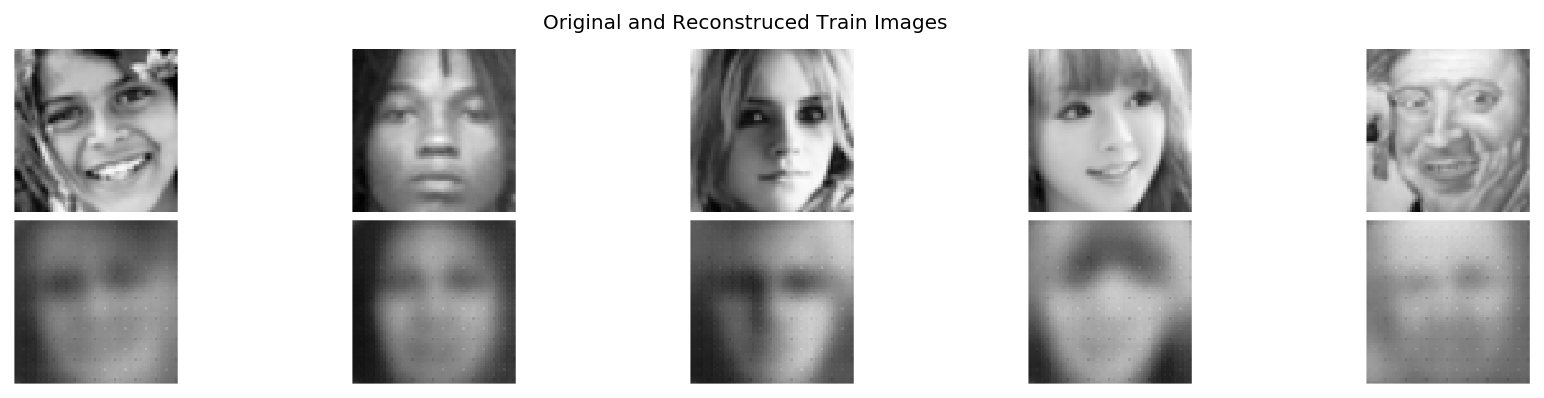

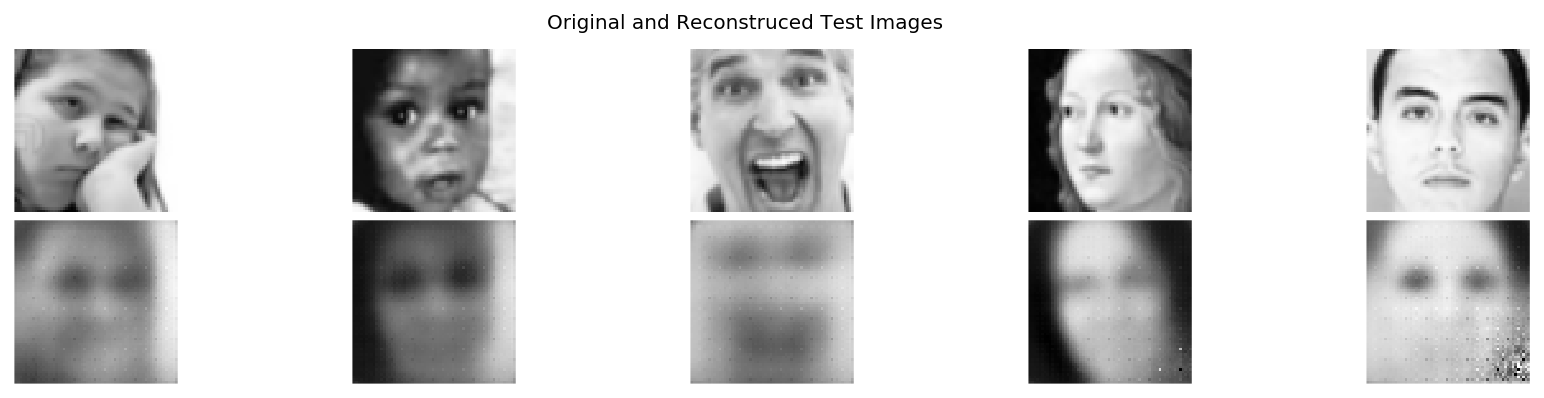

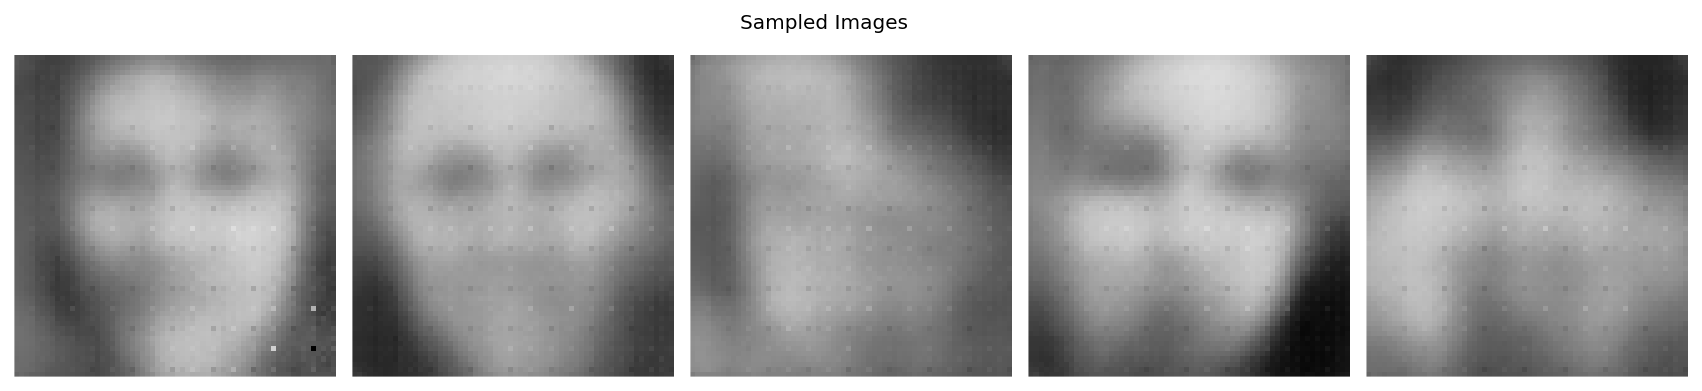

[1e+03/1e+04 12.0%][kl_weight:1.00] [LOSS] TOTAL[276.8]=RECON[230.4]+KL[46.4]
[1e+03/1e+04 14.0%][kl_weight:1.00] [LOSS] TOTAL[317.4]=RECON[249.2]+KL[68.3]
[2e+03/1e+04 16.0%][kl_weight:1.00] [LOSS] TOTAL[269.4]=RECON[221.3]+KL[48.2]
[2e+03/1e+04 18.0%][kl_weight:1.00] [LOSS] TOTAL[273.1]=RECON[225.1]+KL[48.0]
[2e+03/1e+04 20.0%][kl_weight:1.00] [LOSS] TOTAL[792.1]=RECON[288.2]+KL[503.9]


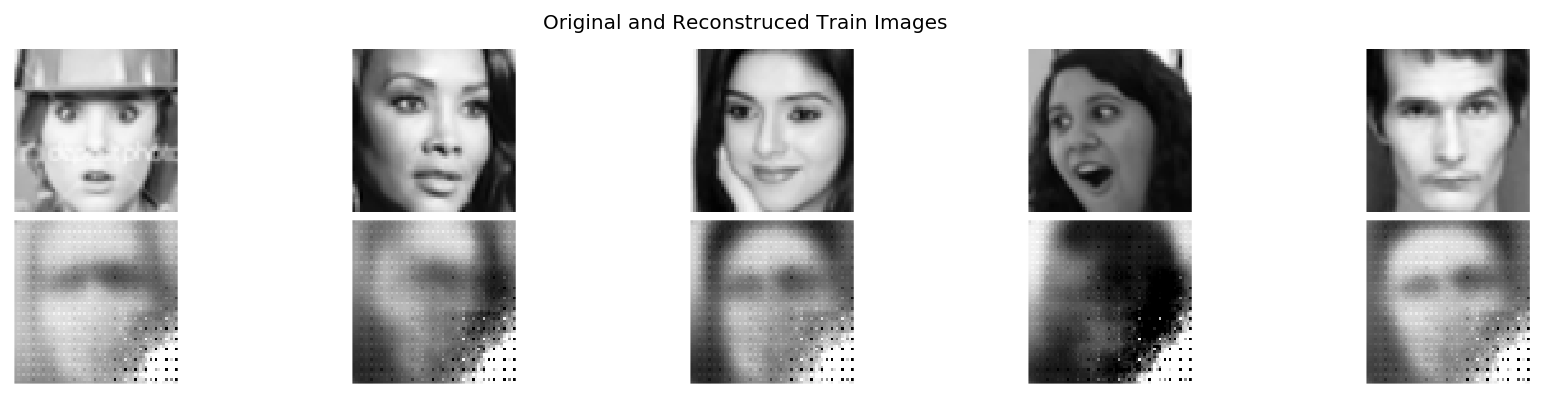

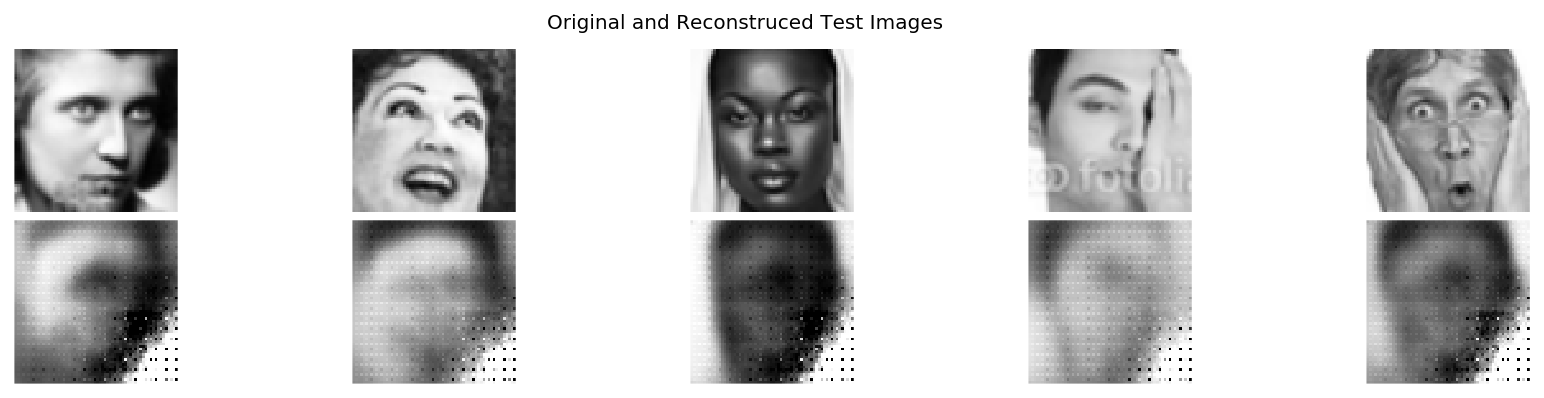

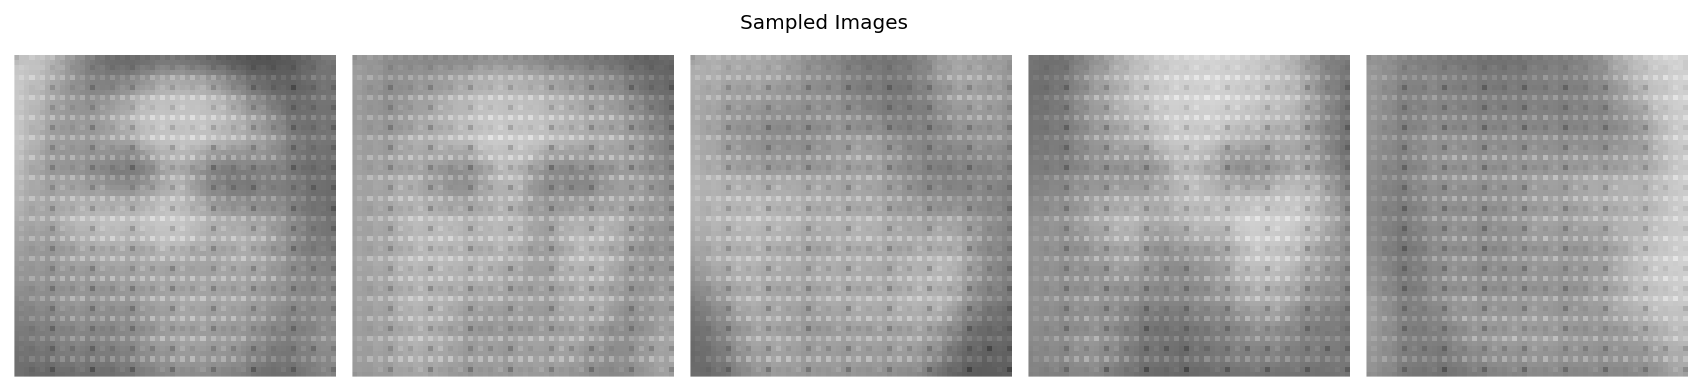

[2e+03/1e+04 22.0%][kl_weight:1.00] [LOSS] TOTAL[341.9]=RECON[237.8]+KL[104.1]
[2e+03/1e+04 24.0%][kl_weight:1.00] [LOSS] TOTAL[341.6]=RECON[227.8]+KL[113.9]
[3e+03/1e+04 26.0%][kl_weight:1.00] [LOSS] TOTAL[257.8]=RECON[212.2]+KL[45.6]
[3e+03/1e+04 28.0%][kl_weight:1.00] [LOSS] TOTAL[268.0]=RECON[216.2]+KL[51.8]
[3e+03/1e+04 30.0%][kl_weight:1.00] [LOSS] TOTAL[256.2]=RECON[206.5]+KL[49.6]


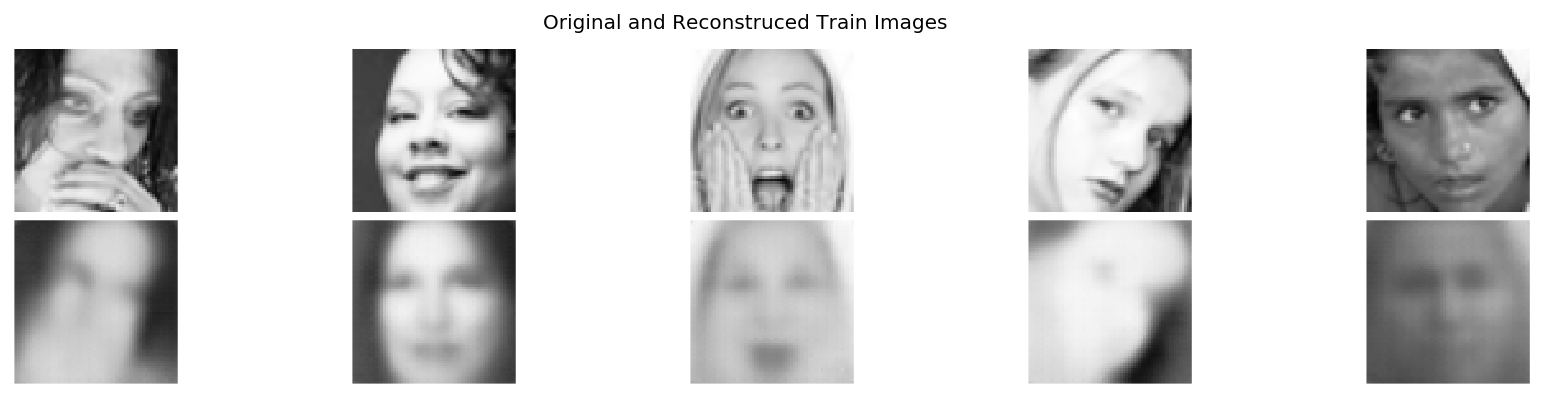

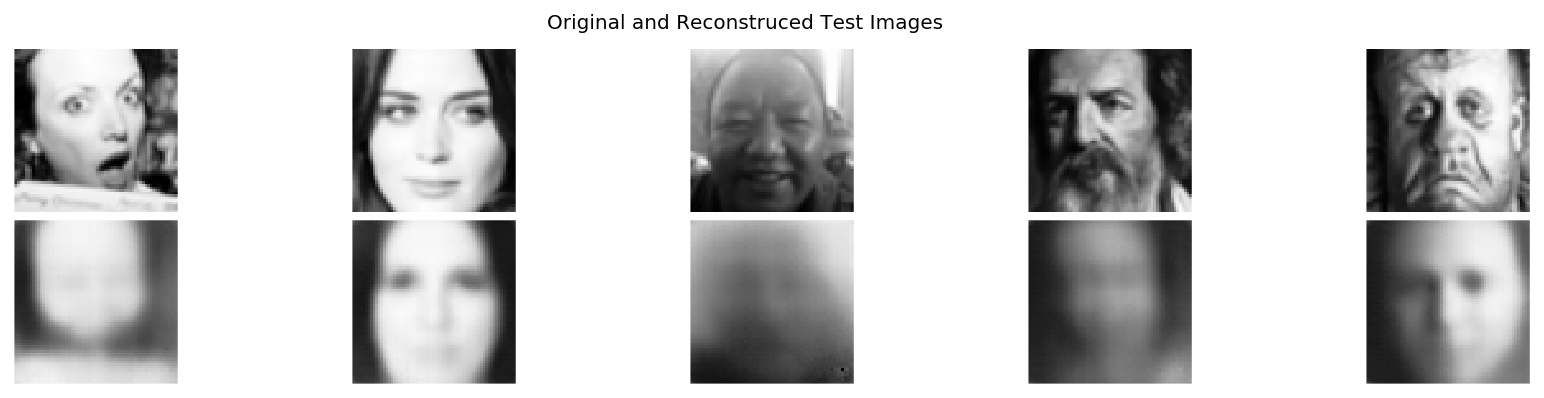

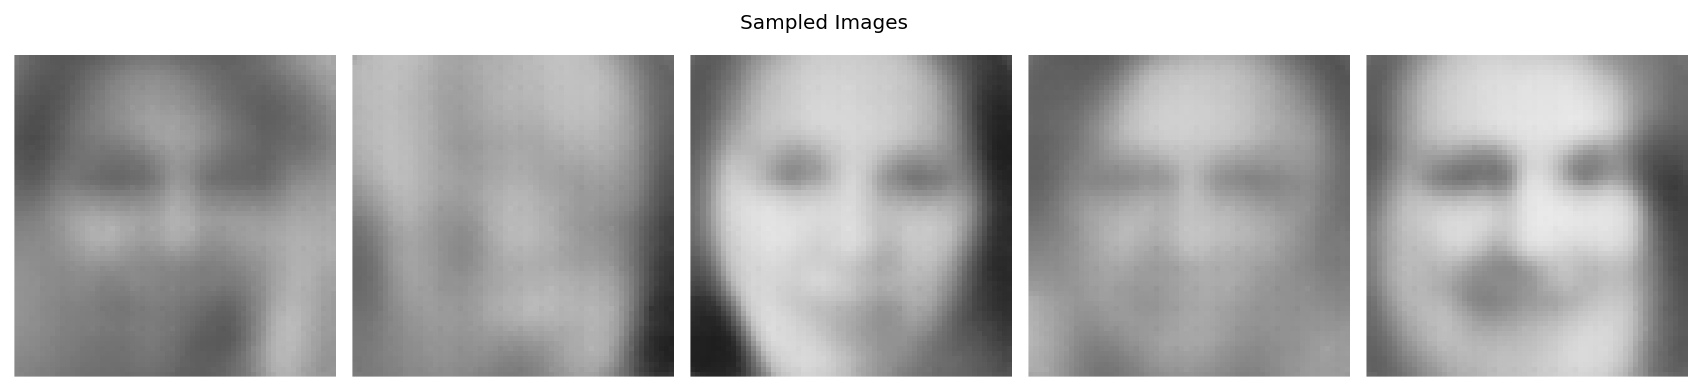

[3e+03/1e+04 32.0%][kl_weight:1.00] [LOSS] TOTAL[241.6]=RECON[192.7]+KL[48.9]
[3e+03/1e+04 34.0%][kl_weight:1.00] [LOSS] TOTAL[348.8]=RECON[230.5]+KL[118.2]
[4e+03/1e+04 36.0%][kl_weight:1.00] [LOSS] TOTAL[1045.5]=RECON[291.4]+KL[754.1]
[4e+03/1e+04 38.0%][kl_weight:1.00] [LOSS] TOTAL[273.9]=RECON[213.0]+KL[60.9]
[4e+03/1e+04 40.0%][kl_weight:1.00] [LOSS] TOTAL[256.8]=RECON[210.0]+KL[46.8]


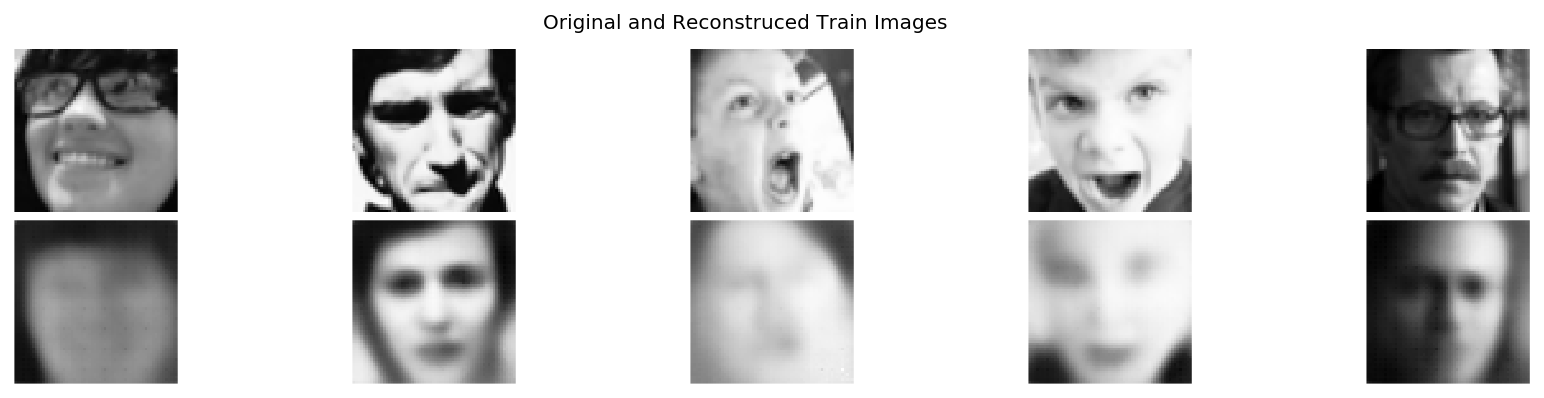

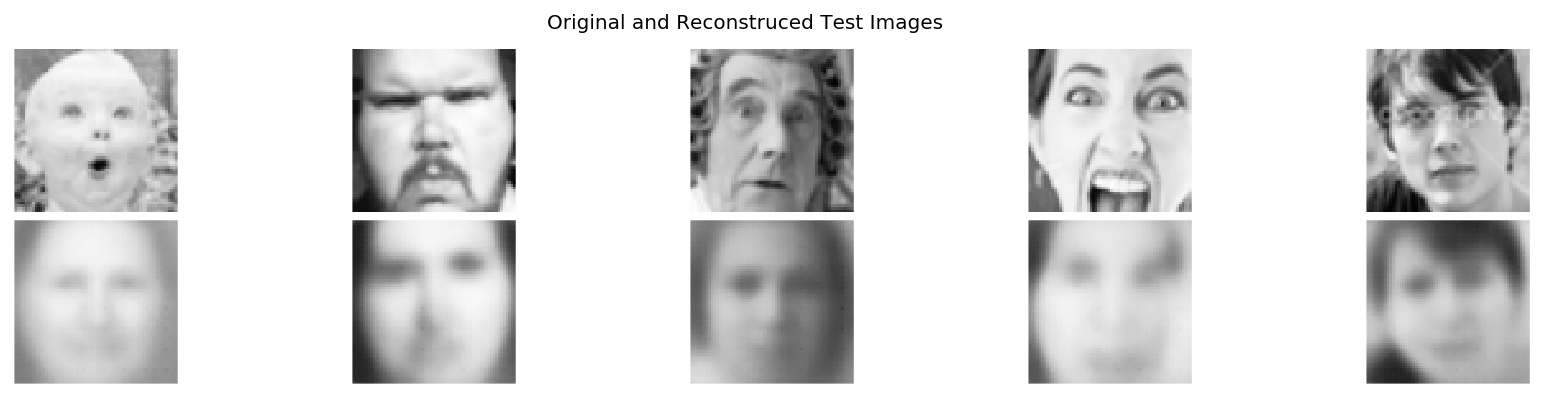

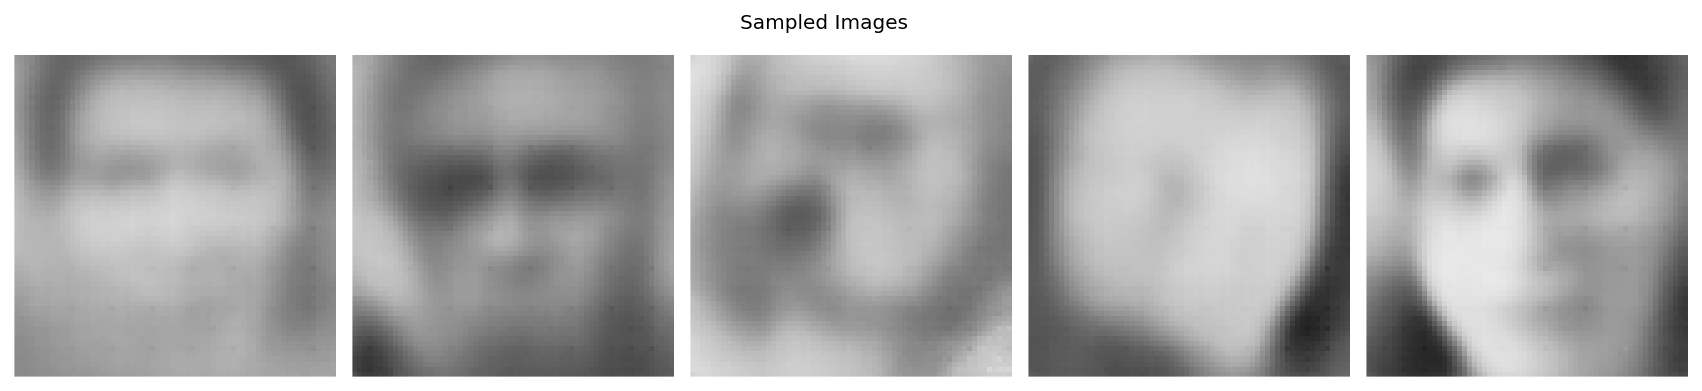

[4e+03/1e+04 42.0%][kl_weight:1.00] [LOSS] TOTAL[258.9]=RECON[213.3]+KL[45.6]
[4e+03/1e+04 44.0%][kl_weight:1.00] [LOSS] TOTAL[325.3]=RECON[217.2]+KL[108.0]
[5e+03/1e+04 46.0%][kl_weight:1.00] [LOSS] TOTAL[278.4]=RECON[212.6]+KL[65.8]
[5e+03/1e+04 48.0%][kl_weight:1.00] [LOSS] TOTAL[258.0]=RECON[207.5]+KL[50.5]
[5e+03/1e+04 50.0%][kl_weight:1.00] [LOSS] TOTAL[253.2]=RECON[204.6]+KL[48.6]


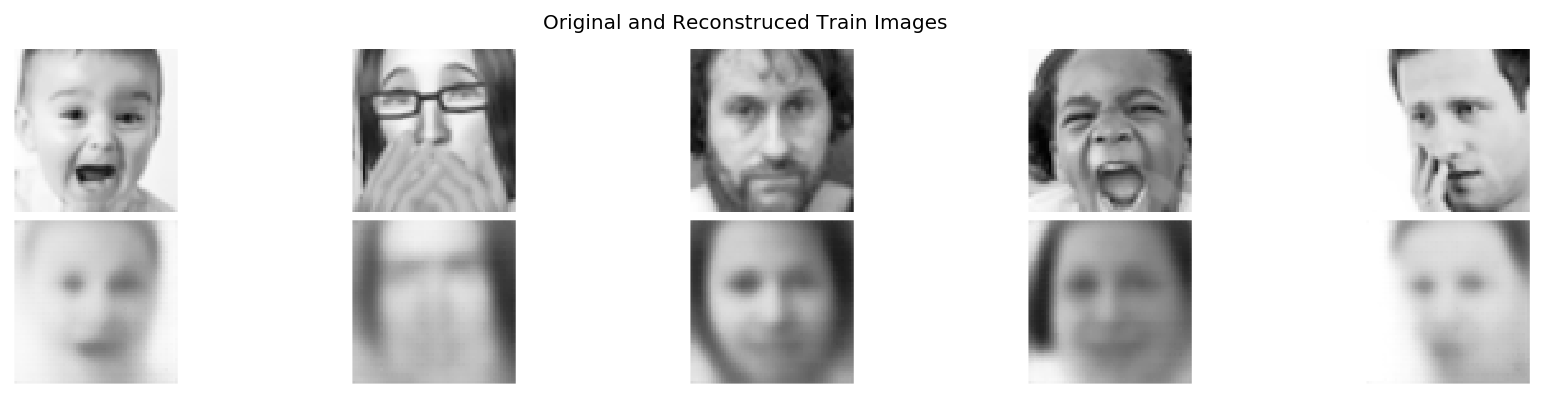

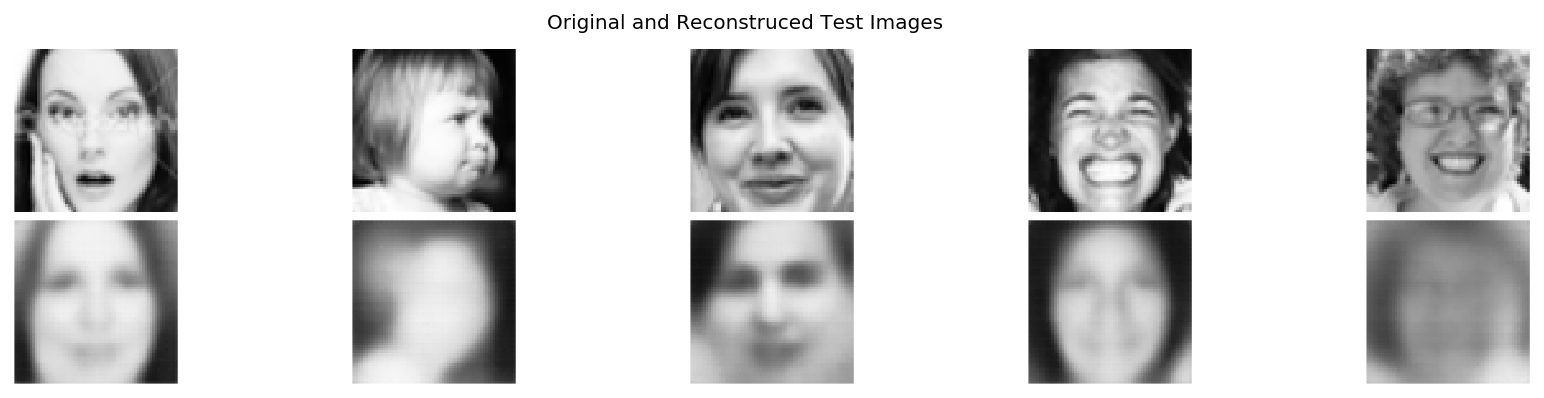

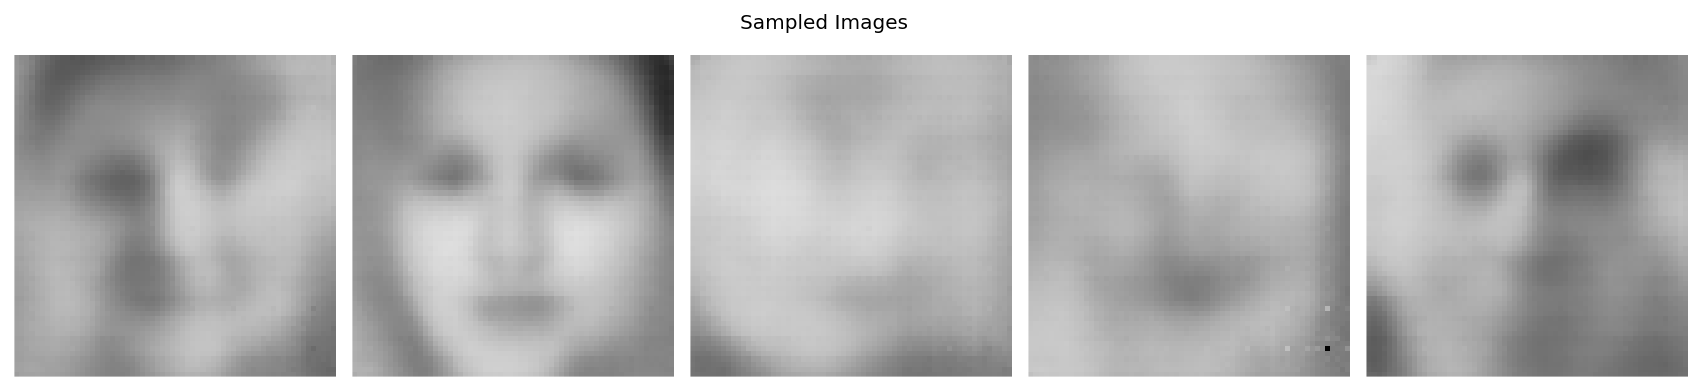

[5e+03/1e+04 52.0%][kl_weight:1.00] [LOSS] TOTAL[249.8]=RECON[207.6]+KL[42.2]
[5e+03/1e+04 54.0%][kl_weight:1.00] [LOSS] TOTAL[237.8]=RECON[193.9]+KL[44.0]
[6e+03/1e+04 56.0%][kl_weight:1.00] [LOSS] TOTAL[240.9]=RECON[200.3]+KL[40.6]
[6e+03/1e+04 58.0%][kl_weight:1.00] [LOSS] TOTAL[244.8]=RECON[197.8]+KL[46.9]
[6e+03/1e+04 60.0%][kl_weight:1.00] [LOSS] TOTAL[264.5]=RECON[202.2]+KL[62.3]


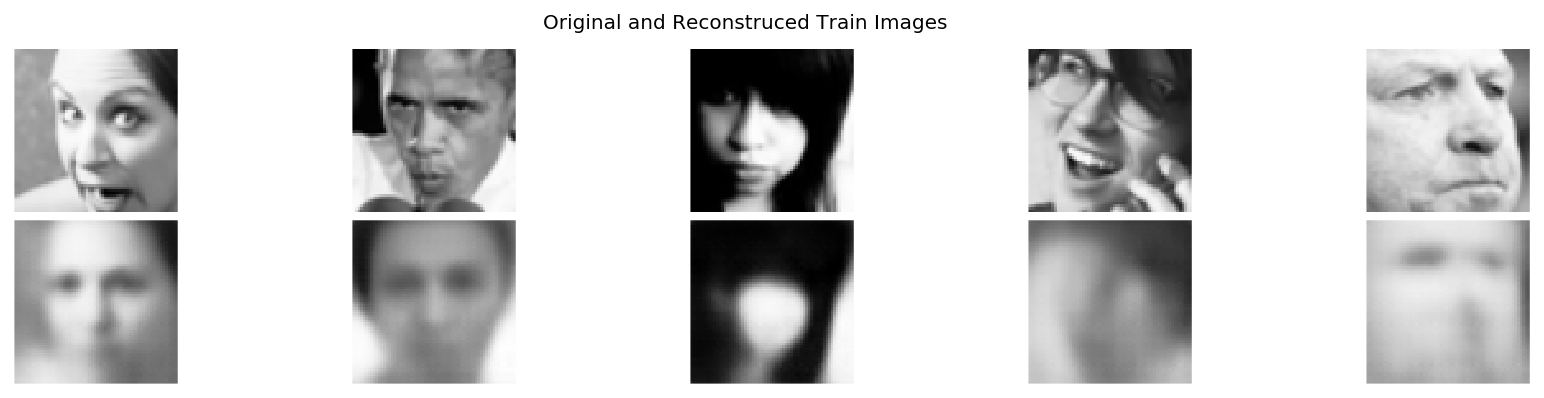

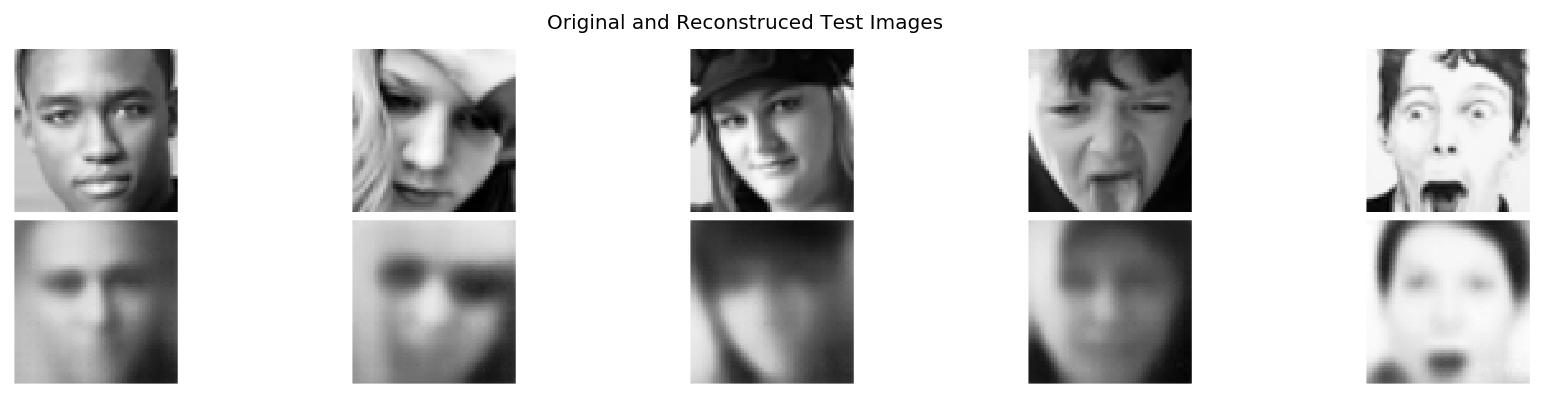

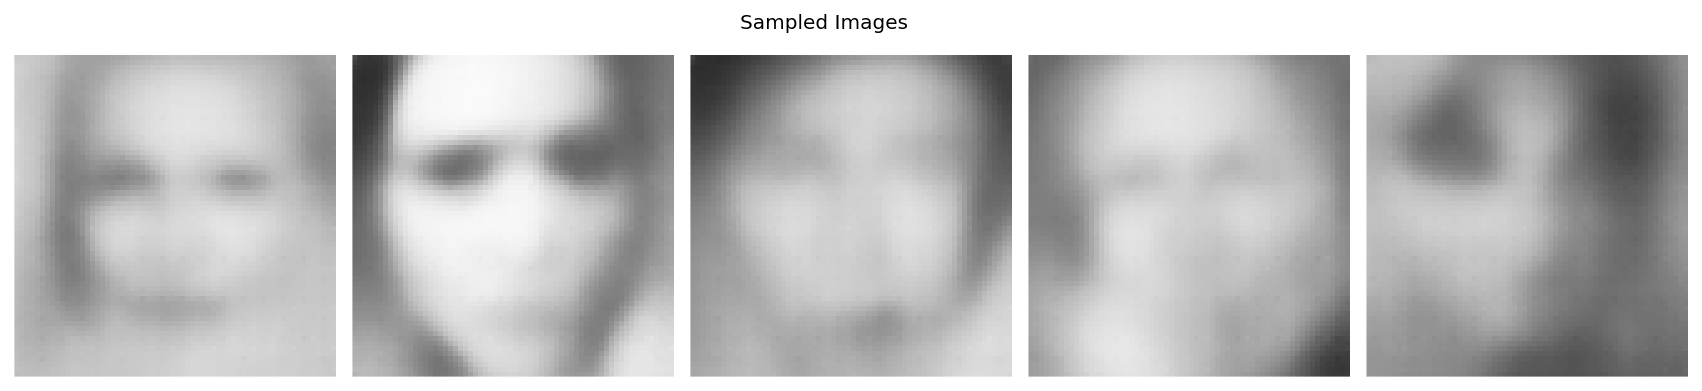

[6e+03/1e+04 62.0%][kl_weight:1.00] [LOSS] TOTAL[257.7]=RECON[198.1]+KL[59.6]
[6e+03/1e+04 64.0%][kl_weight:1.00] [LOSS] TOTAL[265.9]=RECON[203.8]+KL[62.1]
[7e+03/1e+04 66.0%][kl_weight:1.00] [LOSS] TOTAL[255.2]=RECON[196.9]+KL[58.3]
[7e+03/1e+04 68.0%][kl_weight:1.00] [LOSS] TOTAL[253.9]=RECON[197.0]+KL[56.9]
[7e+03/1e+04 70.0%][kl_weight:1.00] [LOSS] TOTAL[252.1]=RECON[201.9]+KL[50.2]


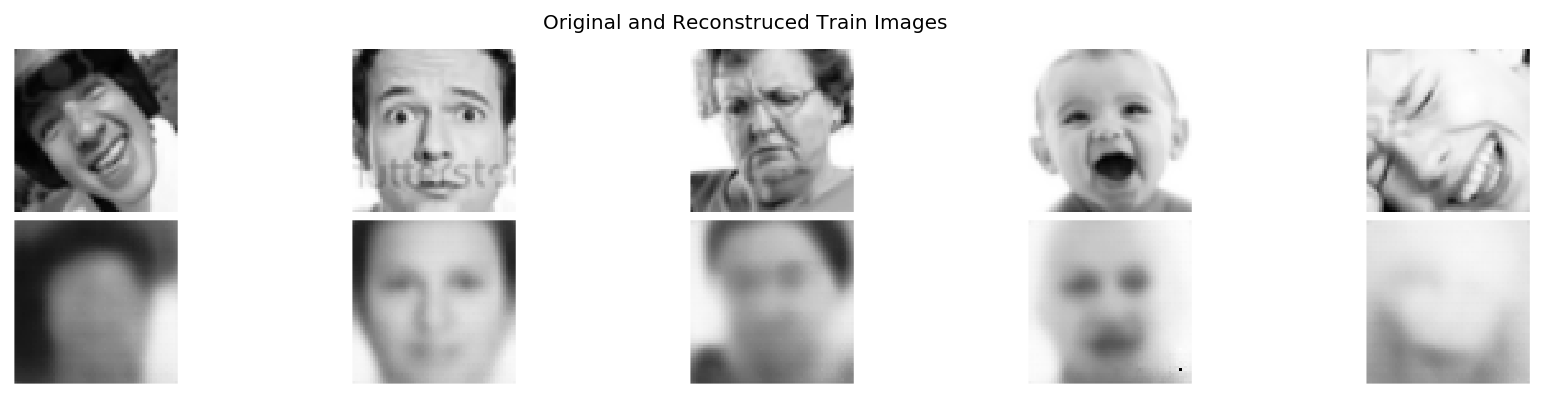

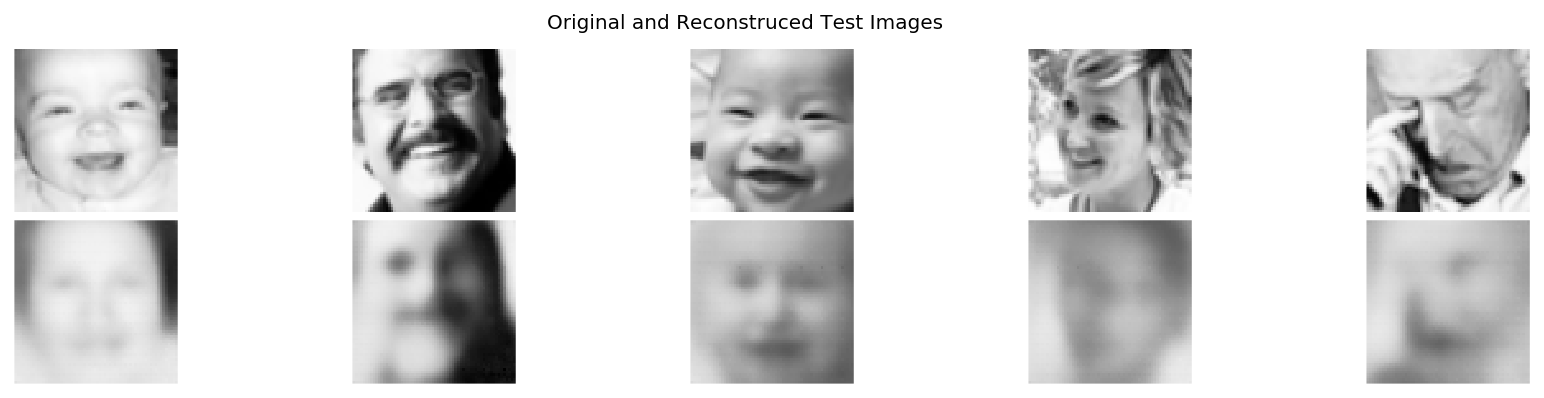

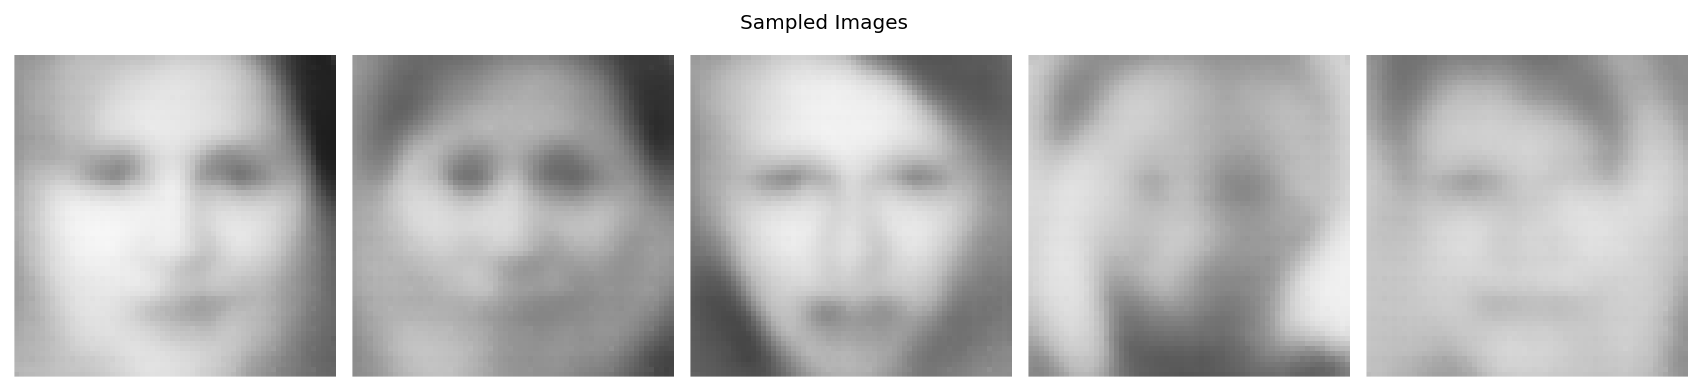

[7e+03/1e+04 72.0%][kl_weight:1.00] [LOSS] TOTAL[253.6]=RECON[199.5]+KL[54.1]
[7e+03/1e+04 74.0%][kl_weight:1.00] [LOSS] TOTAL[246.2]=RECON[191.8]+KL[54.4]
[8e+03/1e+04 76.0%][kl_weight:1.00] [LOSS] TOTAL[240.8]=RECON[188.7]+KL[52.1]
[8e+03/1e+04 78.0%][kl_weight:1.00] [LOSS] TOTAL[243.6]=RECON[197.5]+KL[46.0]
[8e+03/1e+04 80.0%][kl_weight:1.00] [LOSS] TOTAL[244.0]=RECON[198.8]+KL[45.2]


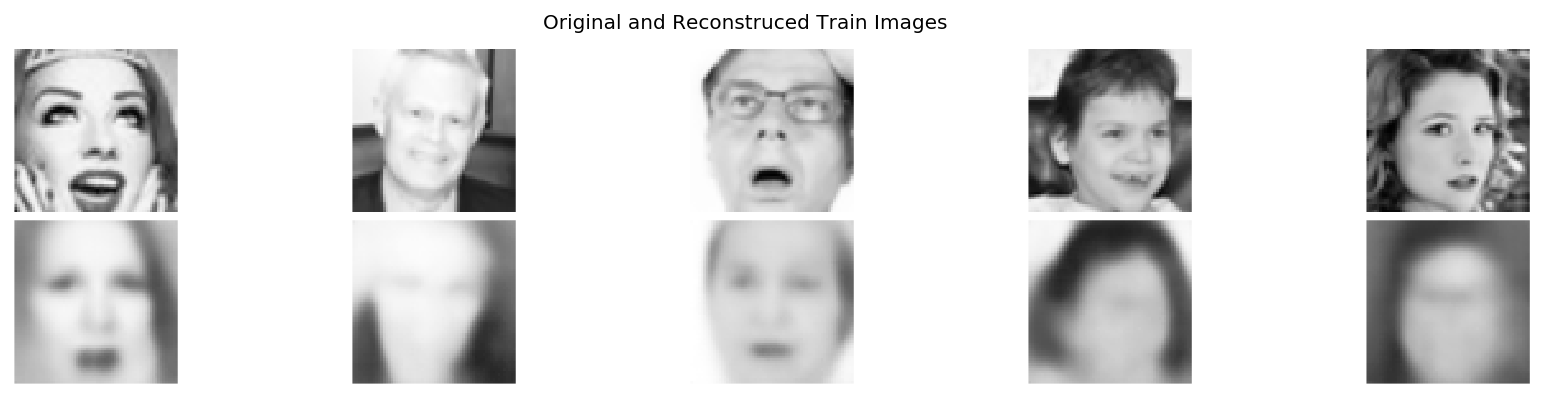

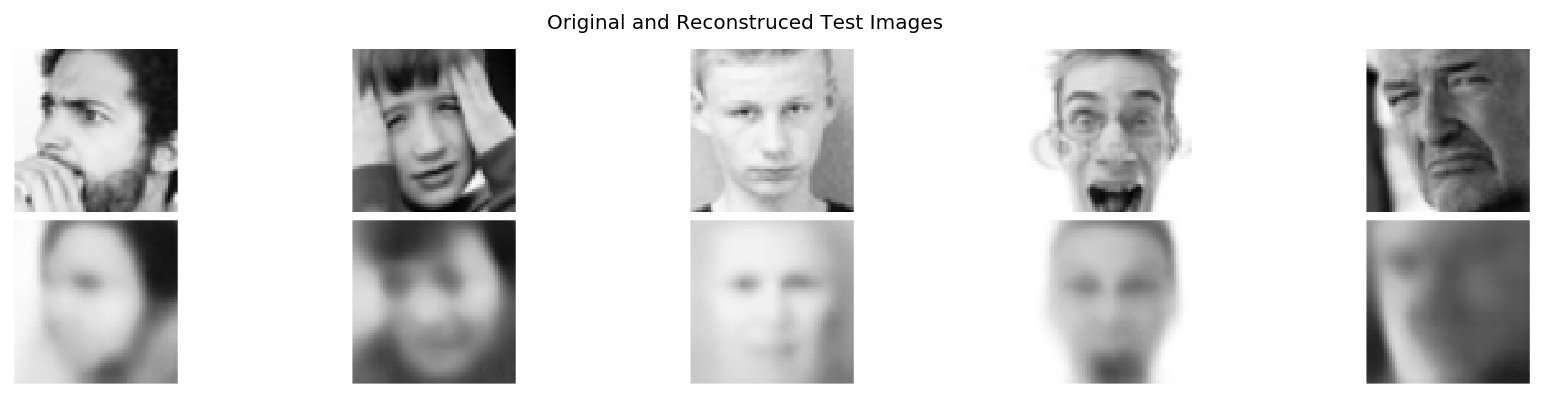

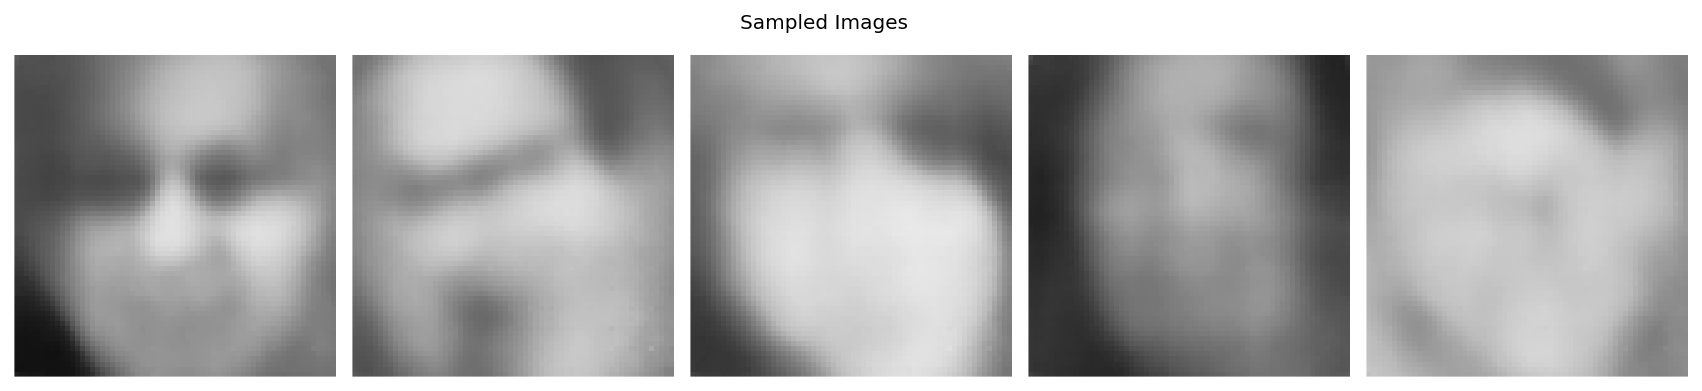

[8e+03/1e+04 82.0%][kl_weight:1.00] [LOSS] TOTAL[246.8]=RECON[196.3]+KL[50.5]
[8e+03/1e+04 84.0%][kl_weight:1.00] [LOSS] TOTAL[238.9]=RECON[195.2]+KL[43.7]
[9e+03/1e+04 86.0%][kl_weight:1.00] [LOSS] TOTAL[243.5]=RECON[191.1]+KL[52.3]
[9e+03/1e+04 88.0%][kl_weight:1.00] [LOSS] TOTAL[235.8]=RECON[188.9]+KL[46.9]
[9e+03/1e+04 90.0%][kl_weight:1.00] [LOSS] TOTAL[242.4]=RECON[192.4]+KL[50.0]


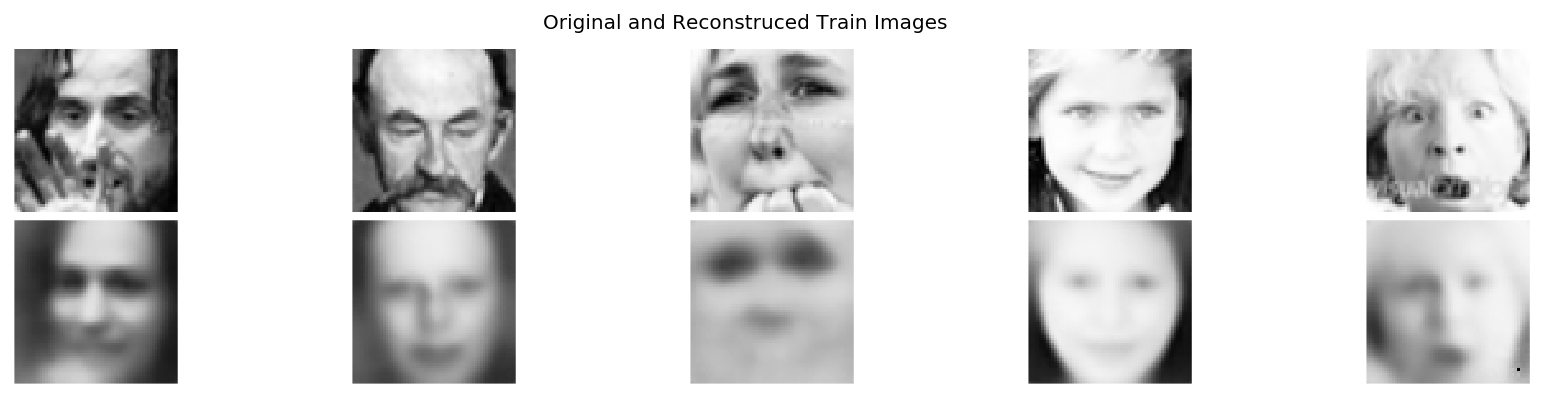

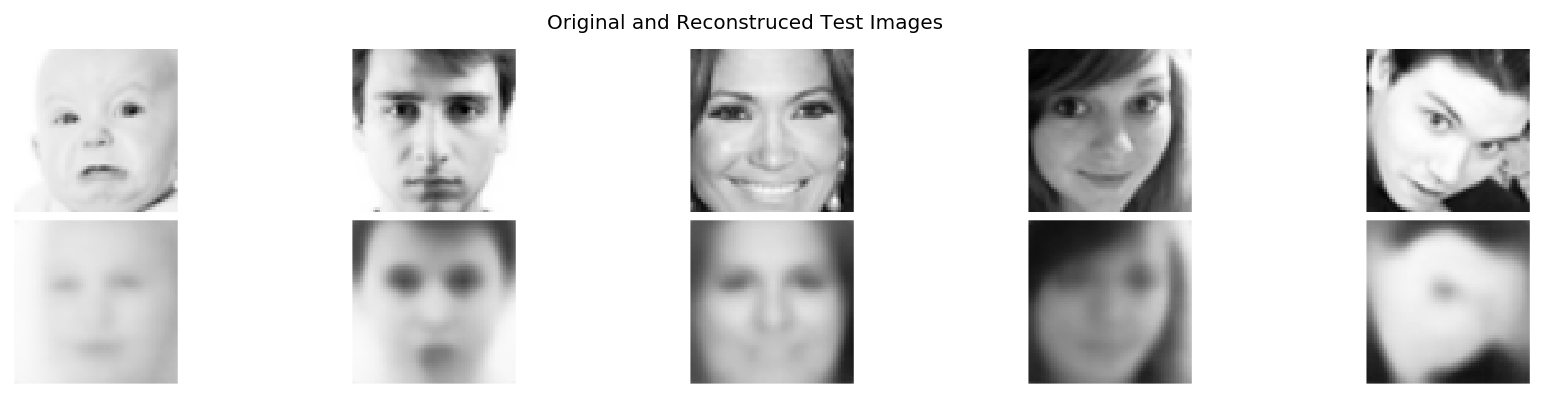

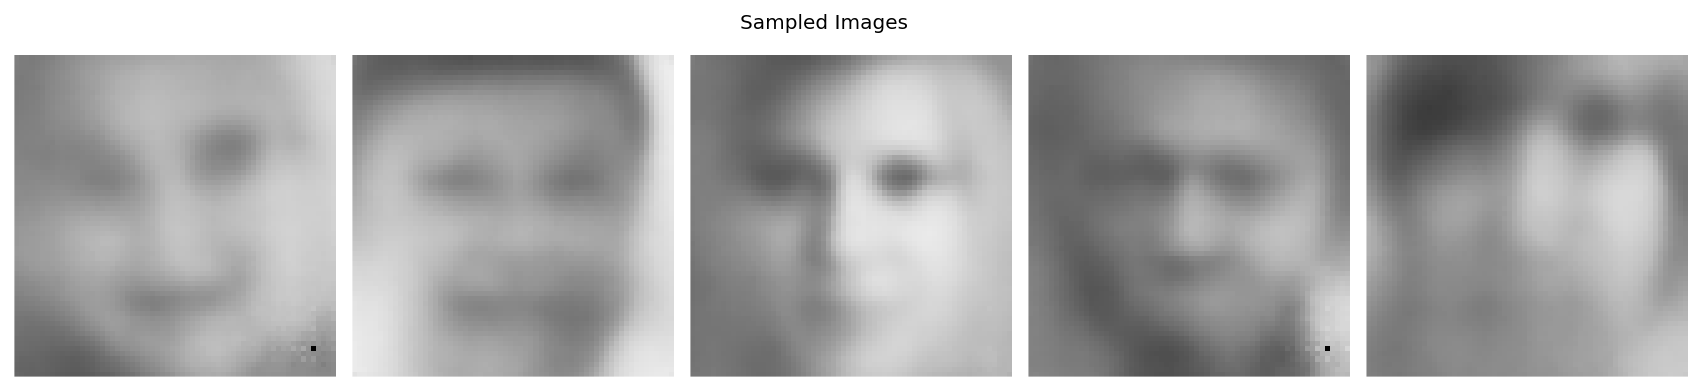

[9e+03/1e+04 92.0%][kl_weight:1.00] [LOSS] TOTAL[247.6]=RECON[194.4]+KL[53.2]
[9e+03/1e+04 94.0%][kl_weight:1.00] [LOSS] TOTAL[246.1]=RECON[192.0]+KL[54.1]
[1e+04/1e+04 96.0%][kl_weight:1.00] [LOSS] TOTAL[254.6]=RECON[201.2]+KL[53.4]
[1e+04/1e+04 98.0%][kl_weight:1.00] [LOSS] TOTAL[266.1]=RECON[203.6]+KL[62.4]
Done


In [4]:
sess = gpusession()
sess.run(tf.global_variables_initializer())
MAXITER,BATCHSIZE = (int)(1e4),128
PRINTEVERY,PLOTEVERY = (int)(MAXITER/50),(int)(MAXITER/10)
for ITER in range(MAXITER):
    RATE      = (float)(ITER)/(float)(MAXITER)
    offset    = (ITER*BATCHSIZE)%(ntrain) 
    batch_x   = trainimg[offset:(offset+BATCHSIZE),:]
    kl_weight = 1
    feeds = {V.x:batch_x,V.is_training:True,V.kl_weight:kl_weight}
    tfops = [V.solver,V.total_loss,V.recon_loss,V.kl_loss]
    _,total_loss,recon_loss,kl_loss=sess.run(tfops,feed_dict=feeds)
    if ITER % PRINTEVERY == 0:
        print ("[%.0e/%.0e %.1f%%][kl_weight:%.2f] [LOSS] TOTAL[%.1f]=RECON[%.1f]+KL[%.1f]"%
               (ITER,MAXITER,RATE*100.,kl_weight,total_loss,recon_loss,kl_loss))
    if ITER % PLOTEVERY == 0:
        """ Plot reconstructed train images """
        xref    = trainimg[np.random.permutation(ntrain)[:5],:]
        xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
        xconcat = np.concatenate((np.reshape(xref,(-1,V.xdim[0],V.xdim[1],V.xdim[2])),
                                  xrecon),axis=0)
        plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
                       _figsize=(15,3),_title='Original and Reconstruced Train Images')
        """ Plot reconstructed test images """
        xref    = testimg[np.random.permutation(ntest)[:5],:]
        xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
        xconcat = np.concatenate((np.reshape(xref,(-1,V.xdim[0],V.xdim[1],V.xdim[2])),
                                  xrecon),axis=0)
        plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
                       _figsize=(15,3),_title='Original and Reconstruced Test Images')
        """ Plot sampled images """
        samples = sess.run(V.xrecon_sample, 
                           feed_dict={V.z:np.random.randn(5,V.zdim),V.is_training:False})
        plot_grid_imgs(samples,_nr=1,_nc=5,_imgshp=xshp,_figsize=(15,3),
                       _title='Sampled Images')
print ("Done")

Save

In [5]:
V.save(_sess=sess,_savename='net/net_dcvae.npz')

[net/net_dcvae.npz] Saved. Size is [162.9]MB


Initialize 

Network initialized


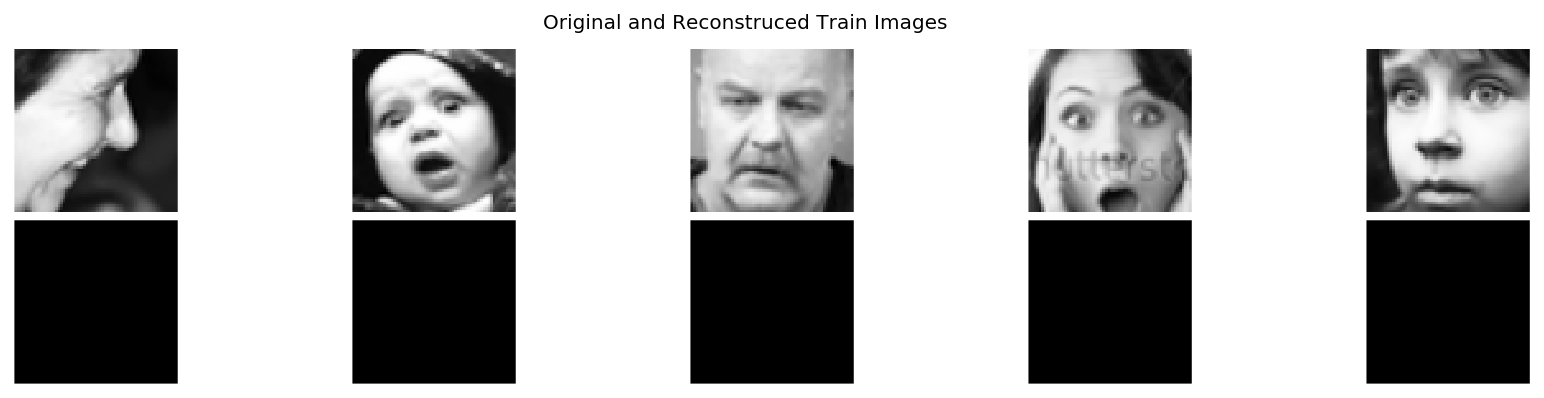

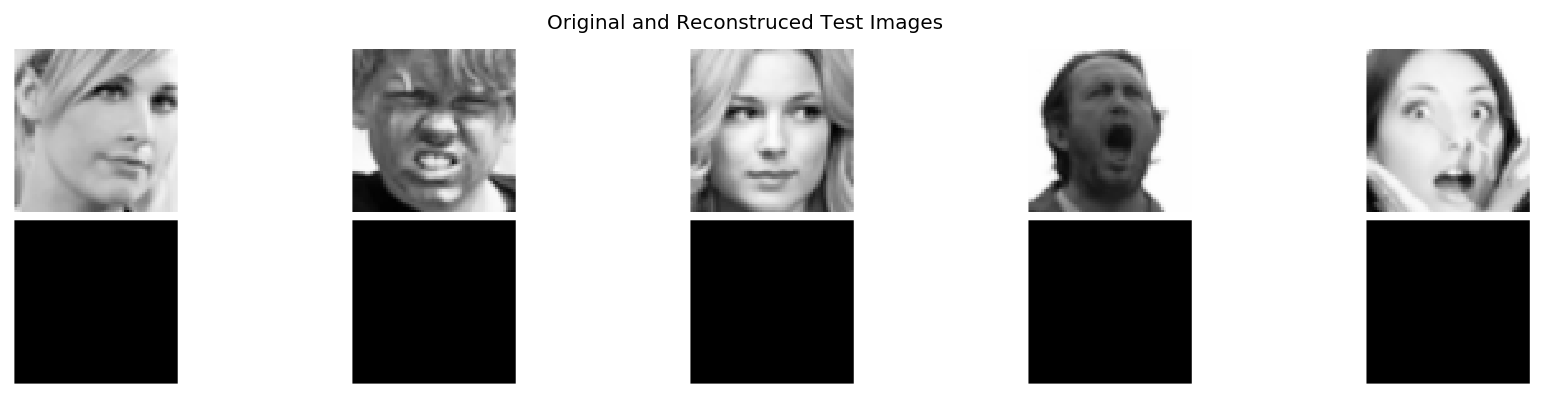

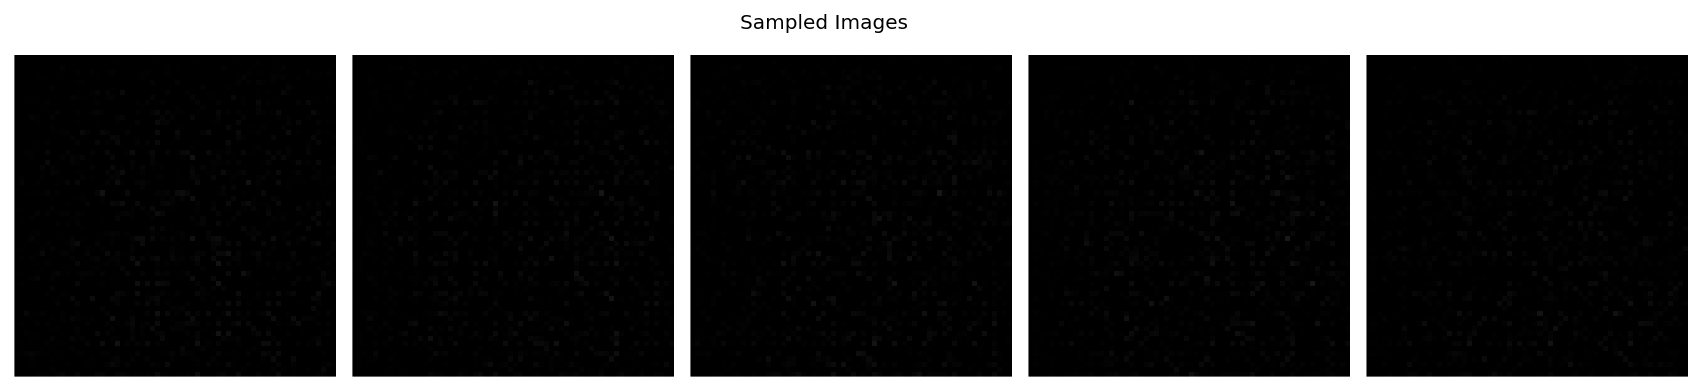

In [6]:
sess.run(tf.global_variables_initializer())
print ("Network initialized")

""" Plot reconstructed train images """
xref    = trainimg[np.random.permutation(ntrain)[:5],:]
xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
xconcat = np.concatenate((np.reshape(xref,(-1,V.xdim[0],V.xdim[1],V.xdim[2])),
                          xrecon),axis=0)
plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
               _figsize=(15,3),_title='Original and Reconstruced Train Images')
""" Plot reconstructed test images """
xref    = testimg[np.random.permutation(ntest)[:5],:]
xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
xconcat = np.concatenate((np.reshape(xref,(-1,V.xdim[0],V.xdim[1],V.xdim[2])),
                          xrecon),axis=0)
plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
               _figsize=(15,3),_title='Original and Reconstruced Test Images')
""" Plot sampled images """
samples = sess.run(V.xrecon_sample, 
                   feed_dict={V.z:np.random.randn(5,V.zdim),V.is_training:False})
plot_grid_imgs(samples,_nr=1,_nc=5,_imgshp=xshp,_figsize=(15,3),
               _title='Sampled Images')

Restore

Weight restored from [net/net_dcvae.npz]
Network restored


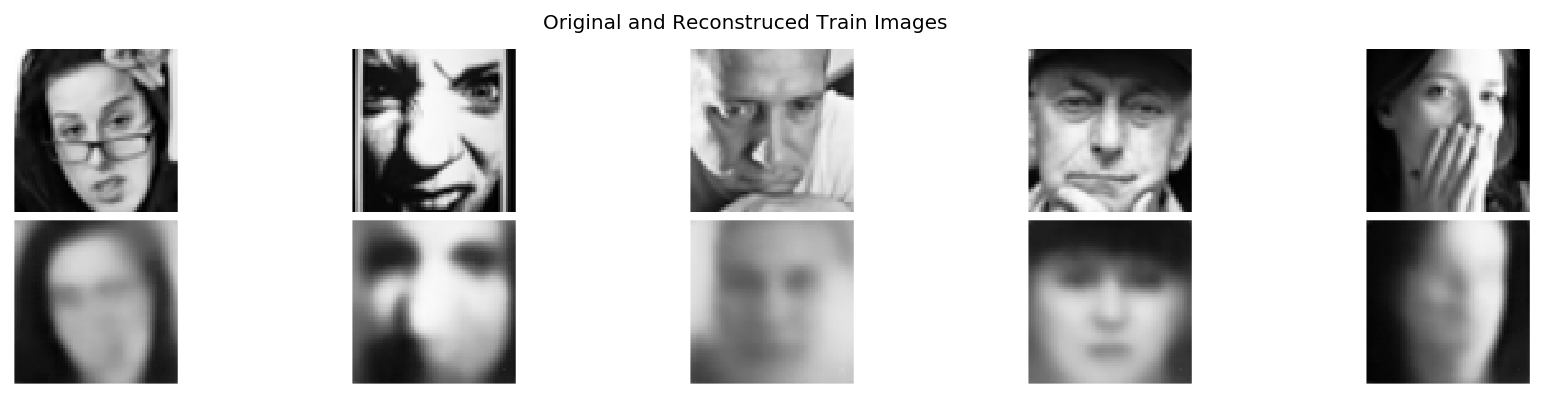

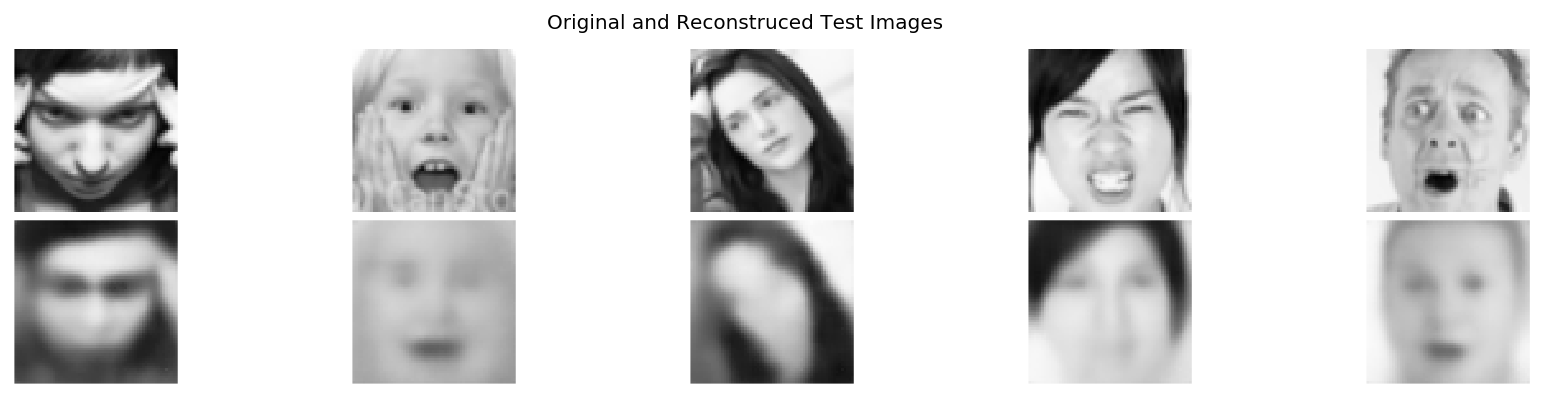

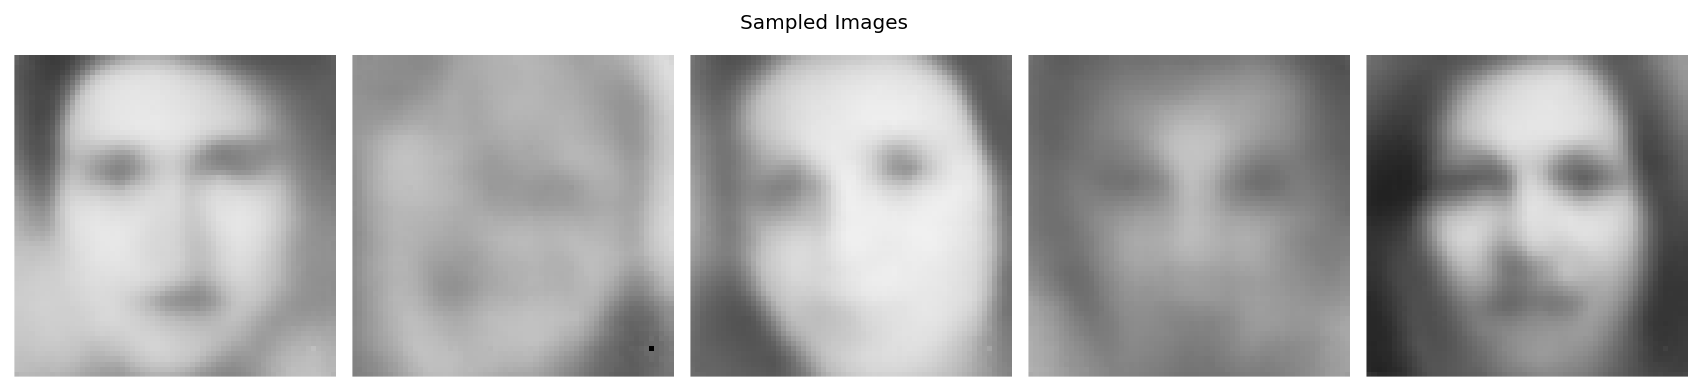

In [7]:
V.restore(_sess=sess,_loadname='net/net_dcvae.npz')
print ("Network restored")

""" Plot reconstructed train images """
xref    = trainimg[np.random.permutation(ntrain)[:5],:]
xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
xconcat = np.concatenate((np.reshape(xref,(-1,V.xdim[0],V.xdim[1],V.xdim[2])),
                          xrecon),axis=0)
plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
               _figsize=(15,3),_title='Original and Reconstruced Train Images')
""" Plot reconstructed test images """
xref    = testimg[np.random.permutation(ntest)[:5],:]
xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
xconcat = np.concatenate((np.reshape(xref,(-1,V.xdim[0],V.xdim[1],V.xdim[2])),
                          xrecon),axis=0)
plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
               _figsize=(15,3),_title='Original and Reconstruced Test Images')
""" Plot sampled images """
samples = sess.run(V.xrecon_sample, 
                   feed_dict={V.z:np.random.randn(5,V.zdim),V.is_training:False})
plot_grid_imgs(samples,_nr=1,_nc=5,_imgshp=xshp,_figsize=(15,3),
               _title='Sampled Images')